In [51]:
import pandas as pd

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
import seaborn as sns
import collections

In [52]:
# Import dataset
df = pd.read_csv('../Data/3. Labeling/labeling-prosa.csv')

# Menampilkan total dataset
print("Total Dataset :", len(df))

df.head()

Total Dataset : 4804


,video_id,comment_text,text_cleaned,text_removal,text_normalized,text_manual_replaced,text_tokenize,label
0,video1,Baiknya bagaimana menurut kalian?,baiknya bagaimana menurut kalian,baik bagaimana turut kalian,baik bagaimana turut kalian,baik bagaimana turut kalian,"['baik', 'bagaimana', 'turut', 'kalian']",neutral
1,video1,Betul dok betul dok,betul dok betul dok,betul dok betul dok,betul dok betul dok,betul dok betul dok,"['betul', 'dok', 'betul', 'dok']",neutral
2,video1,Betul dok mungkin efek sa di,betul dok mungkin efek sa di,betul dok mungkin efek sa,betul dok mungkin efek sa,betul dok mungkin efek sa,"['betul', 'dok', 'mungkin', 'efek', 'sa']",neutral
3,video1,"Bpom aneh, tidak kerja. Kenapa ko seperti itu.",bpom aneh tidak kerja kenapa ko seperti itu,bpom aneh kerja ko itu,bpom aneh kerja kok itu,bpom aneh kerja kok itu,"['bpom', 'aneh', 'kerja', 'kok', 'itu']",negative
4,video1,Benar banget anak sy aj hrs sirup minum obatny...,benar banget anak sy aj hrs sirup minum obatny...,benar banget anak sy aj hrs sirup minum obat d...,benar banget anak saya saja harus sirup minum ...,benar banget anak aku saja harus sirup minum o...,"['benar', 'banget', 'anak', 'aku', 'saja', 'ha...",neutral


In [53]:
# Mengecek isi kolom khusus
df['label'].unique()

array(['neutral', 'negative', 'positive', 'skipped'], dtype=object)

In [54]:
# Menghitung jumlah kemunculan setiap nilai pada kolom khusus
df['label'].value_counts()


neutral     1802
negative    1568
positive    1408
skipped       26
Name: label, dtype: int64

In [55]:
# Menampilkan kolom "text" pada baris dengan nilai "skipped" pada kolom "label"
skipped_text = df.loc[df['label'] == 'skipped', 'text_tokenize']
print(skipped_text)

48      ['lah', 'kalo', 'rezim', 'nya', 'planga', 'plo...
50      ['akibat', 'tri', 'sehat', 'ketua', 'bpom', 'p...
343     ['versi', 'dosis', 'eg', 'yang', 'semoga', 'kg...
425     ['lama', 'produksi', 'indonesia', 'yakin', 'ti...
566     ['benar', 'itu', 'kata', 'dari', 'nya', 'janga...
887     ['yang', 'aneh', 'enggak', 'sih', 'harus', 'ta...
973     ['aku', 'bagi', 'cerita', 'kepada', 'dari', 'i...
1138    ['mohon', 'maaf', 'kalo', 'komentar', 'agak', ...
1144    ['kalau', 'enggak', 'salah', 'ijin', 'obat', '...
1181    ['sudah', 'urgensi', 'tgkt', 'tinggi', 'bpom',...
1271    ['kalau', 'turut', 'ketika', 'anak', 'sakit', ...
1615    ['ingat', 'sama', 'kasus', 'bedak', 'bayi', 'e...
1897    ['mohon', 'ijin', 'ikut', 'sedikit', 'komentar...
1921    ['kok', 'dok', 'alfa', 'aku', 'baru', 'beli', ...
2092    ['inti', 'kan', 'masih', 'biar', 'kemenkes', '...
2241    ['jujur', 'aku', 'sendiri', 'bawa', 'anak', 'o...
2705    ['pernah', 'kerja', 'salah', 'satu', 'usaha', ...
3170    ['dari

In [56]:
# Menampilkan satu persatu baris pada kolom "text_tokenize" dengan nilai 'skipped' pada kolom 'label'
skipped_indices = df[df['label'] == 'skipped'].index.tolist()

for i in skipped_indices:
    text = df.loc[i, 'text_tokenize']
    
    print('Index:', i)
    print('Text:', text)
    
    # Memberikan pilihan label
    valid_labels = {'1': 'negative', '2': 'neutral', '3': 'positive'}
    label = input('Masukkan keterangan label (1(negative)/2(neutral)/3(positive)): ')
    while label not in valid_labels.keys():
        label = input('Keterangan label tidak valid. Masukkan keterangan label (1/2/3): ')
    df.loc[i, 'label'] = valid_labels[label]

Index: 48
Text: ['lah', 'kalo', 'rezim', 'nya', 'planga', 'plongo', 'di', 'atur', 'oligarki', 'kay', 'gini', 'indonesia', 'repot', 'kan', 'akal', 'akal', 'rezim']
Index: 50
Text: ['akibat', 'tri', 'sehat', 'ketua', 'bpom', 'pegang', 'bukan', 'ahli', 'lihat', 'bingung', 'tidak', 'berani', 'ambil', 'tindak', 'ketua', 'bpom', 'lulus', 'teknik', 'lingkung', 'kok', 'jadi', 'ketua', 'bpom', 'bpom', 'teknik', 'kimia', 'apoteker', 'teknologi', 'pangan', 'terus', 'menkesnya', 'fisika', 'nuklir', 'kok', 'jadi', 'tri', 'sehat', 'menkes', 'profesor', 'fakultas', 'dokter', 'sehat', 'masyarakat', 'lihat', 'kerja', 'plonga', 'plongo', 'tidak', 'ambil', 'tindak', 'cepat', 'panteslah', 'amburadul']
Index: 343
Text: ['versi', 'dosis', 'eg', 'yang', 'semoga', 'kg', 'berat', 'badan', 'hari', 'semoga', 'kg', 'berat', 'badan', 'hari', 'beda', 'hingga', 'kali', 'lipat', 'kata', 'thermos', 'es', 'ml', 'kandung', 'eg', 'kali', 'ambang', 'batas', 'semoga', 'ml', 'botol', 'kemas', 'tersebut', 'kali', 'kali', 'se

In [57]:
# Menghitung jumlah kemunculan setiap nilai pada kolom khusus
df['label'].value_counts()

neutral     1813
negative    1579
positive    1412
Name: label, dtype: int64

Label Encoding

In [58]:
# Define Label Encoder object
le = LabelEncoder()

# Define dictionary for label encoding
label_dict = {'positive': 1, 'negative': -1, 'neutral': 0}

# Encode label using dictionary
df['label'] = df['label'].map(label_dict)
df.head()

,video_id,comment_text,text_cleaned,text_removal,text_normalized,text_manual_replaced,text_tokenize,label
0,video1,Baiknya bagaimana menurut kalian?,baiknya bagaimana menurut kalian,baik bagaimana turut kalian,baik bagaimana turut kalian,baik bagaimana turut kalian,"['baik', 'bagaimana', 'turut', 'kalian']",0
1,video1,Betul dok betul dok,betul dok betul dok,betul dok betul dok,betul dok betul dok,betul dok betul dok,"['betul', 'dok', 'betul', 'dok']",0
2,video1,Betul dok mungkin efek sa di,betul dok mungkin efek sa di,betul dok mungkin efek sa,betul dok mungkin efek sa,betul dok mungkin efek sa,"['betul', 'dok', 'mungkin', 'efek', 'sa']",0
3,video1,"Bpom aneh, tidak kerja. Kenapa ko seperti itu.",bpom aneh tidak kerja kenapa ko seperti itu,bpom aneh kerja ko itu,bpom aneh kerja kok itu,bpom aneh kerja kok itu,"['bpom', 'aneh', 'kerja', 'kok', 'itu']",-1
4,video1,Benar banget anak sy aj hrs sirup minum obatny...,benar banget anak sy aj hrs sirup minum obatny...,benar banget anak sy aj hrs sirup minum obat d...,benar banget anak saya saja harus sirup minum ...,benar banget anak aku saja harus sirup minum o...,"['benar', 'banget', 'anak', 'aku', 'saja', 'ha...",0


Missing Values

In [59]:
df.isnull().sum()

video_id                 0
comment_text             0
text_cleaned            11
text_removal            11
text_normalized         11
text_manual_replaced    11
text_tokenize            0
label                    0
dtype: int64

In [60]:
df.dropna(inplace=True)
df.isnull().sum()

video_id                0
comment_text            0
text_cleaned            0
text_removal            0
text_normalized         0
text_manual_replaced    0
text_tokenize           0
label                   0
dtype: int64

Duplicate Values

In [61]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4799    False
4800    False
4801    False
4802     True
4803    False
Length: 4793, dtype: bool

In [62]:
df.drop_duplicates(inplace=True)

Wordcloud

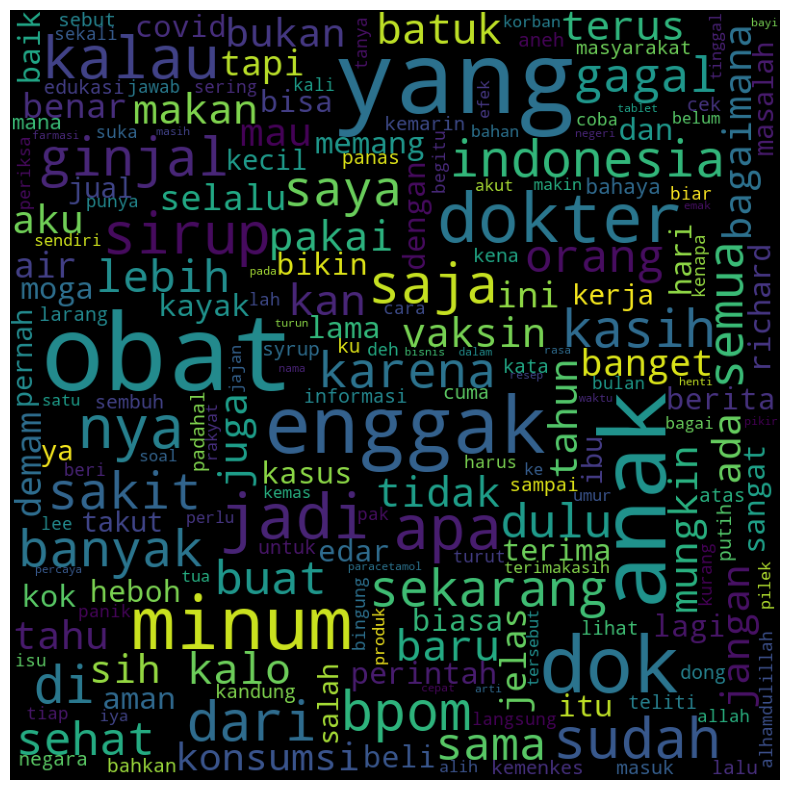

In [63]:
all_text = " ".join(df['text_normalized'])
wordcloud = WordCloud(width=800, height=800, max_font_size=110, collocations = False).generate(all_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Frekuensi kemunculan kata

In [64]:
c = collections.Counter(all_text.split())

most_common = c.most_common(100)
key = [word for word, freq in most_common]
val = [freq for word, freq in most_common]

print(key, val)

['obat', 'yang', 'anak', 'dok', 'enggak', 'minum', 'dokter', 'jadi', 'nya', 'kalau', 'apa', 'sirup', 'sudah', 'dari', 'saja', 'bpom', 'ginjal', 'di', 'kasih', 'sakit', 'indonesia', 'banyak', 'sekarang', 'karena', 'saya', 'semua', 'gagal', 'dulu', 'buat', 'sehat', 'orang', 'sama', 'lebih', 'baru', 'kalo', 'kan', 'batuk', 'makan', 'pakai', 'tidak', 'terus', 'vaksin', 'juga', 'aku', 'mau', 'ada', 'jangan', 'bukan', 'bagaimana', 'mungkin', 'sih', 'tahu', 'tahun', 'konsumsi', 'banget', 'jelas', 'selalu', 'demam', 'ini', 'air', 'tapi', 'benar', 'perintah', 'memang', 'aman', 'baik', 'kok', 'moga', 'terima', 'dan', 'itu', 'lama', 'kayak', 'richard', 'kasus', 'berita', 'heboh', 'hari', 'sangat', 'lagi', 'bikin', 'dengan', 'bisa', 'covid', 'biasa', 'edar', 'beli', 'kerja', 'takut', 'ya', 'masalah', 'pernah', 'kecil', 'ibu', 'salah', 'jual', 'bahaya', 'mana', 'masyarakat', 'kemarin'] [2457, 2248, 1799, 1298, 1283, 1108, 975, 822, 735, 727, 718, 670, 654, 641, 620, 612, 599, 571, 565, 537, 528, 52

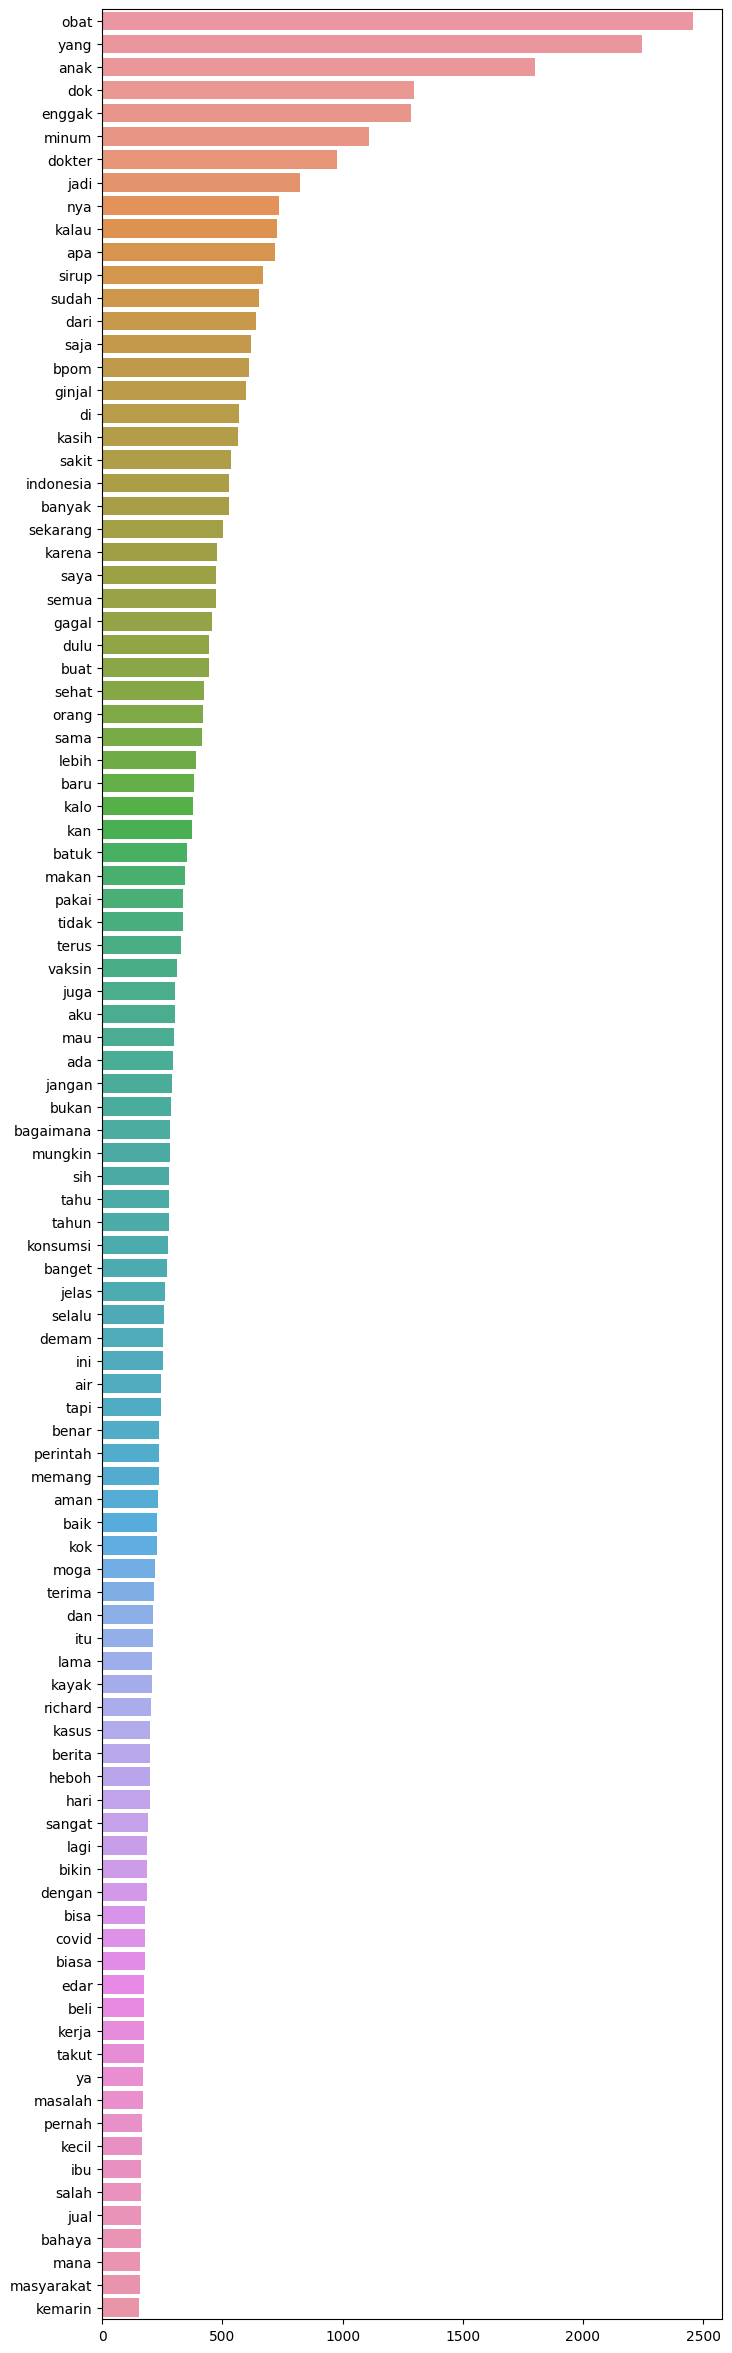

In [65]:
plt.figure(figsize=(8,30))
sns.barplot(x=val, y=key)
plt.show()

Distribusi data (Label)

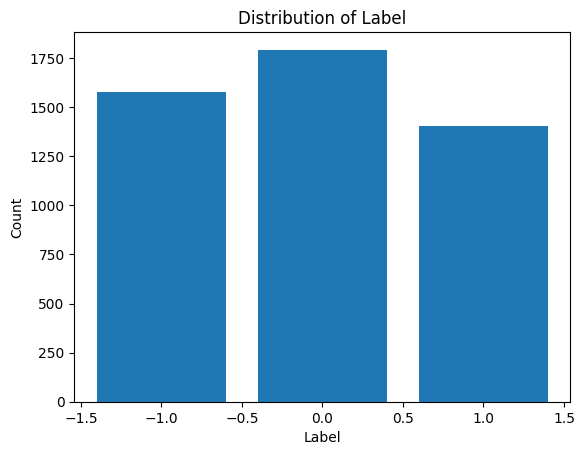

In [66]:
# Count the values in the label column
label_counts = df['label'].value_counts()

# Plot the distribution of the label column
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')
plt.show()


In [67]:
df.to_csv('../Data/4. EDA/clean-eda.csv', index=False)